In [1]:
## Most Important 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## other
import missingno as msno
import os

## Model Selection
from sklearn.model_selection import train_test_split

## Metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

## Preprocessing 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

## Models
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Load the Data ana Look at the big picture

In [ ]:
## Read the csv file using pandas
file_path = os.path.join(os.getcwd(), r'C:\Users\20109\OneDrive - Egyptian E-Learning University\Desktop\Projects_Data\Machine Learning\1- ML_Regression_full_House\housing.csv')
df_housing = pd.read_csv(file_path)

## show the head of the Df
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
## check the info (nulls and datatypes)
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
## some statistics of the Df --> target column is (median_house_value)
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
## check the nulls
df_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Exploratory Data Analysis (EDA)

categories of (ocean_proximity):  
 ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
********************************************************************************


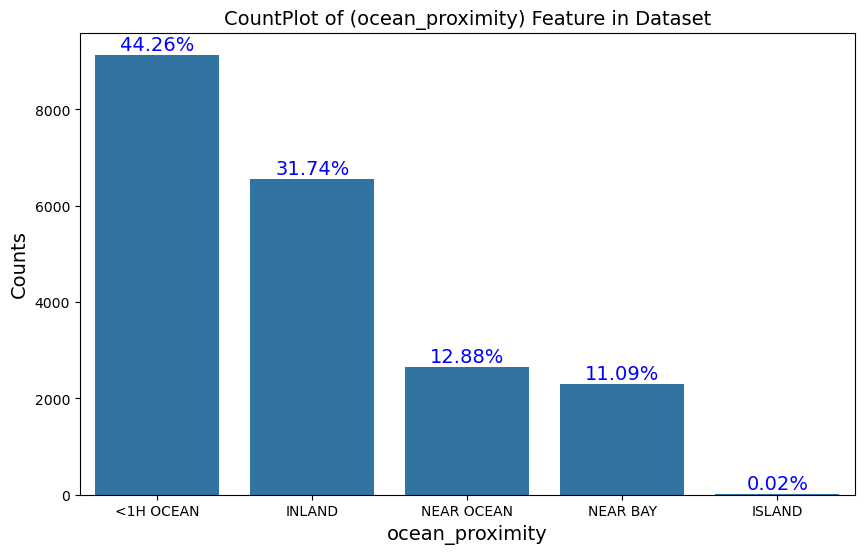

In [13]:
## Check the Distribution of (ocean_proximity) Feature in Dataset
ocean_values = df_housing['ocean_proximity'].value_counts()
print('categories of (ocean_proximity):  \n', ocean_values)
print("**"*40)

## plotting
plt.figure(figsize=(10,6))
sns.countplot(x="ocean_proximity", data= df_housing, order=ocean_values.index) ## ordered
plt.title("CountPlot of (ocean_proximity) Feature in Dataset",fontsize=14, c="k")
plt.xlabel("ocean_proximity", fontsize=14, c="k")
plt.ylabel("Counts", fontsize=14, c="k")

## showing the percenatge
for i in range(ocean_values.shape[0]):
    count = ocean_values.iloc[i]
    start = "{:0.2f}%".format(100*count / df_housing.shape[0])
    plt.text(i,count+100, start, ha="center", color="blue", fontsize=14)

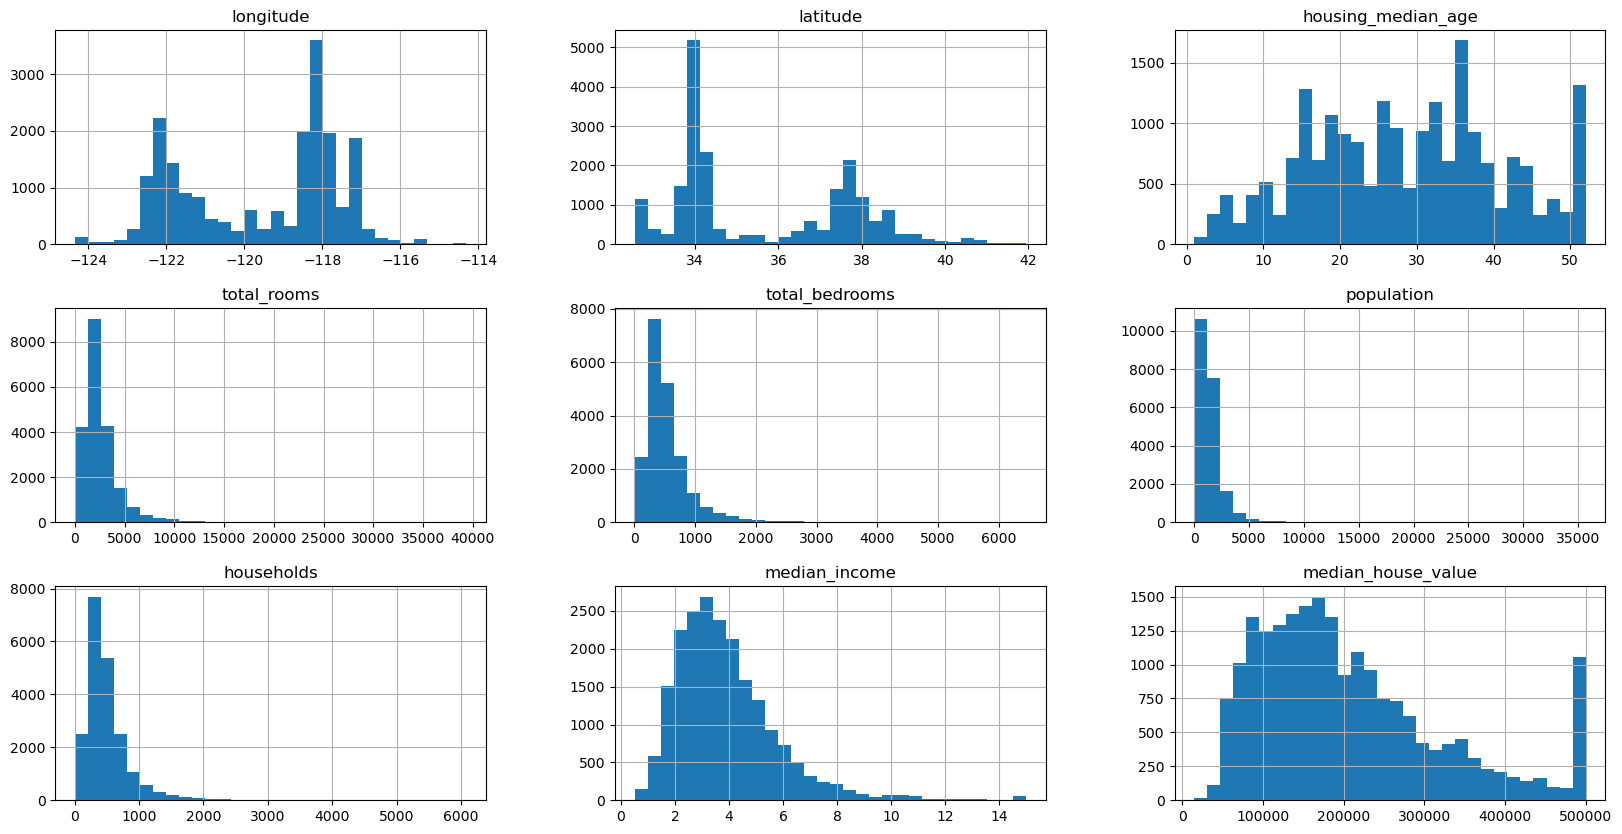

In [15]:
## Histogram Distribution of Nimerical Variables in Dataset
df_housing.hist(bins=30, figsize=(20,10))
plt.show()

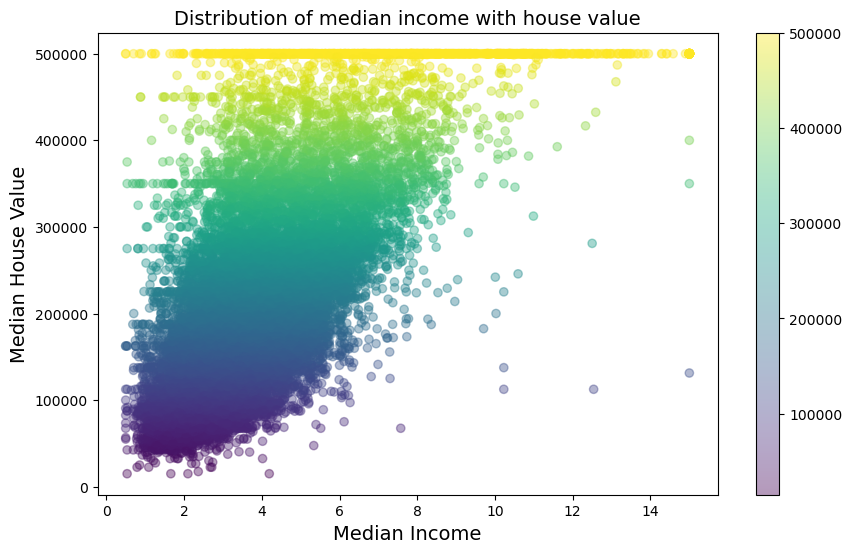

In [17]:
## scatte plot with important features (median_income) with the target (median_house_value)
plt.figure(figsize=(10,6))
sc=plt.scatter(df_housing["median_income"], df_housing["median_house_value"], alpha=0.4, c=df_housing["median_house_value"])
plt.colorbar(sc)
plt.title("Distribution of median income with house value", fontsize=14, c="k")
plt.xlabel("Median Income", fontsize=14, c="k")
plt.ylabel("Median House Value", fontsize=14, c="k")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

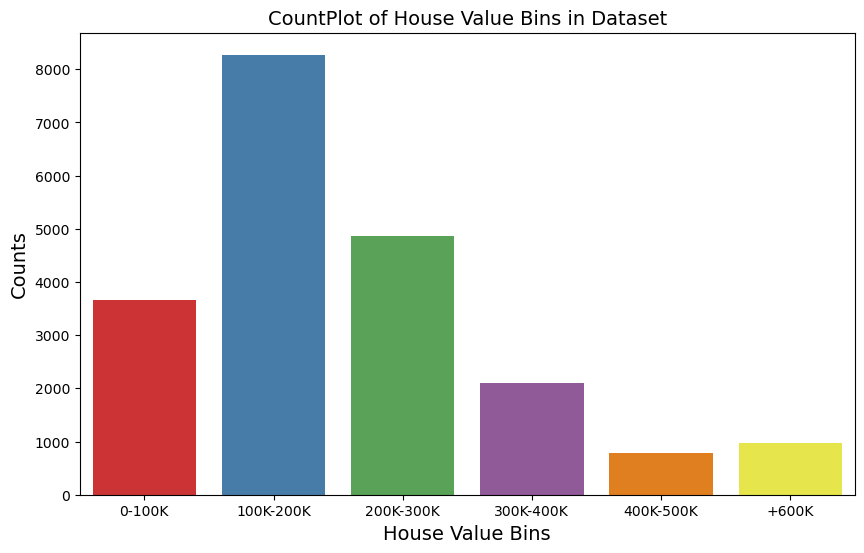

In [19]:
## Try for (median_house_value) to convert it to chunks (bins)
## Cut this numerical feature to categorical for its values to be in range will be in the same category
## In the following example -- any value between range (0-100k) will be the same category, I name it (0-100k)
house_value_bins = pd.cut(x=df_housing["median_house_value"],
                          bins=[0, 100000, 200000, 300000, 400000, 500000, np.inf],
                          labels=["0-100K", "100K-200K", "200K-300K", "300K-400K", "400K-500K", "+600K"])

## countplot for the above chunks
plt.figure(figsize=(10,6))
sns.countplot(hue=house_value_bins, x=house_value_bins, palette="Set1", legend=False)
plt.title("CountPlot of House Value Bins in Dataset", fontsize=14, c="k")
plt.xlabel("House Value Bins", fontsize=14, c="k")
plt.ylabel("Counts", fontsize=14, c="k")
plt.show

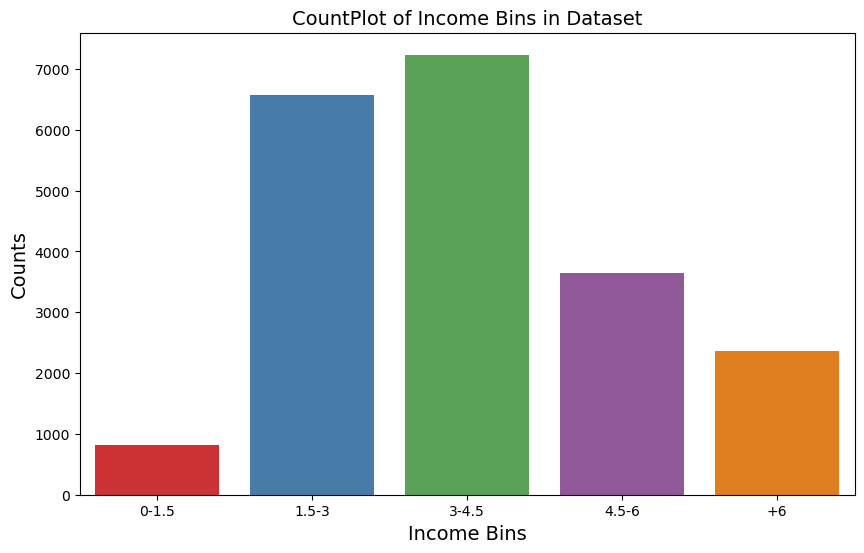

In [21]:
## Let's try the same above code for (median_income), I think it is very important feature
income_bins = pd.cut(x=df_housing["median_income"],
                     bins=[0, 1.5, 3, 4.5, 6, np.inf],
                     labels=["0-1.5", "1.5-3", "3-4.5", "4.5-6", "+6"])

## countplot for the above chunks
plt.figure(figsize=(10,6))
sns.countplot(hue=income_bins, x=income_bins, palette="Set1", legend=False)
plt.title("CountPlot of Income Bins in Dataset", fontsize=14, c="k")
plt.xlabel("Income Bins", fontsize=14,c="k")
plt.ylabel("Counts", fontsize=14, c="k")
plt.show()    

### Bivariate Visualization

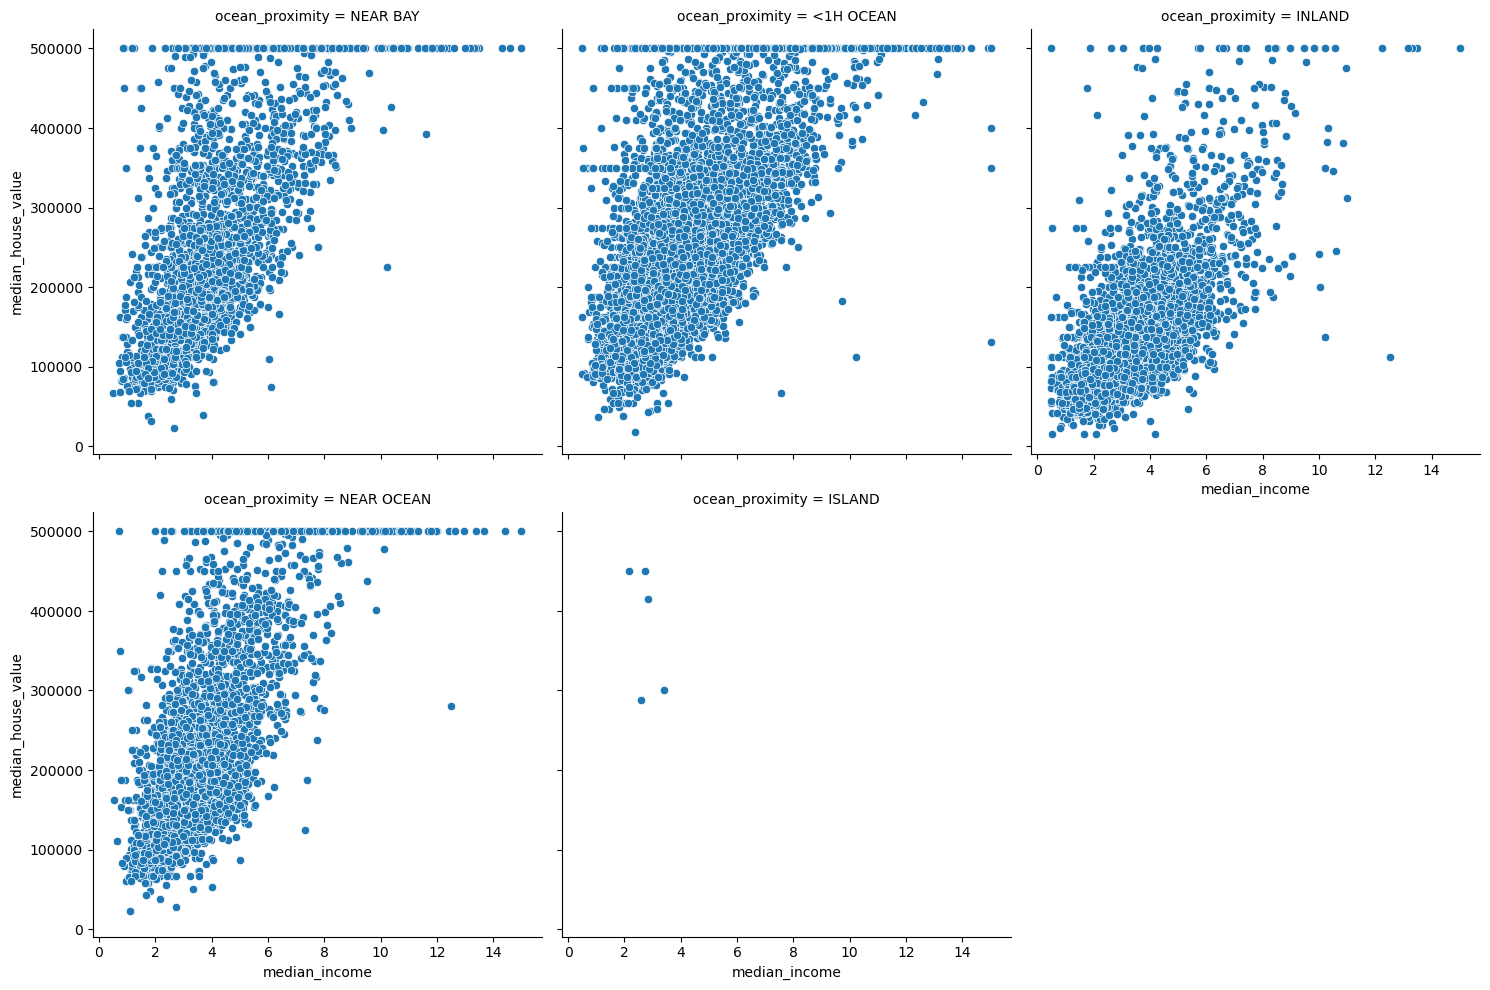

In [23]:
## Scatter plot with (median_income) and (median_house_value) at each (ocean_proximity)
## very important
sns.relplot(x="median_income", y="median_house_value", data=df_housing,
            kind="scatter", col="ocean_proximity", col_wrap=3)
plt.show()

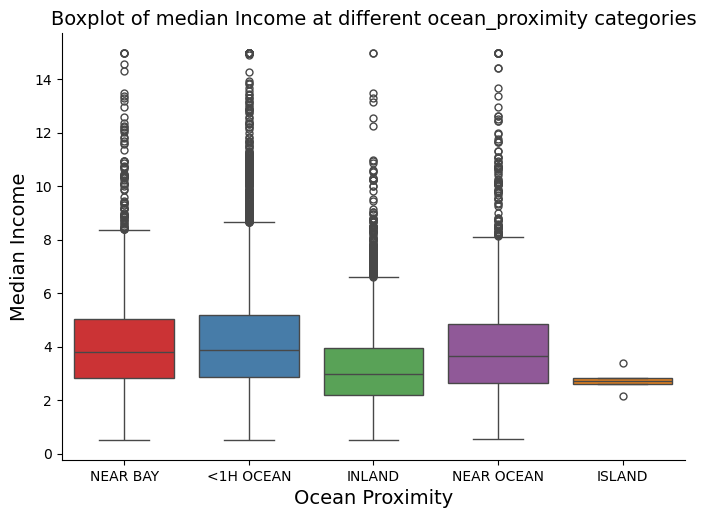

In [25]:
## Check the Boxplot of the (median_income) at different categories of (ocean_proximity)
sns.catplot(x="ocean_proximity", y="median_income", hue="ocean_proximity", data=df_housing, kind="box",
            height=5, palette="Set1", aspect=1.4)
plt.title("Boxplot of median Income at different ocean_proximity categories", fontsize=14, c="k")
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median Income', fontsize=14, c='k')
plt.show()

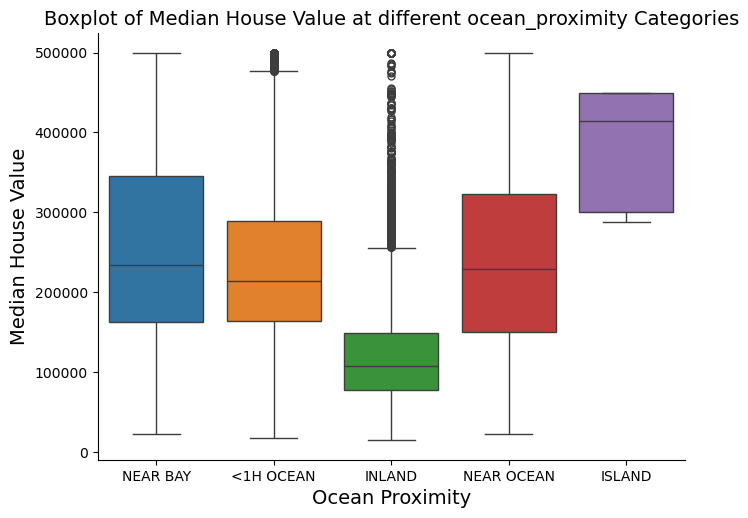

In [27]:
## Check the Boxplot of the (median_house_value) at different categories of (ocean_proximity)
sns.catplot(x='ocean_proximity', y='median_house_value', hue='ocean_proximity',  data=df_housing,
            kind='box', height=5, aspect=1.4)
plt.title('Boxplot of Median House Value at different ocean_proximity Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

### Multivariate Visualization

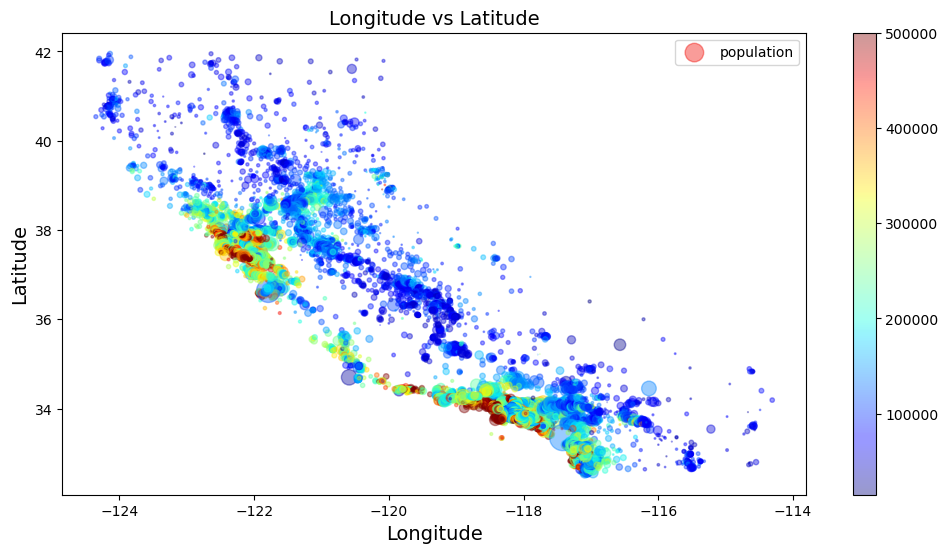

In [30]:
## Scatter plot for (longitued & latitued), and add population as the size of the point and the color as (house_value)
plt.figure(figsize=(12,6))
sc=plt.scatter(df_housing["longitude"], df_housing["latitude"], s=df_housing["population"]/100,
               alpha=0.4, c=df_housing["median_house_value"],cmap=plt.get_cmap("jet"), label="population")
plt.colorbar(sc)
plt.title("Longitude vs Latitude", fontsize=14, c="k")
plt.xlabel("Longitude", fontsize=14, c="k")
plt.ylabel("Latitude", fontsize=14, c="k")
plt.legend()
plt.show()

### Check the correlation between the Features and the Target

In [33]:
## Correlatio (pearson correlation only number)
df_housing.select_dtypes(include='number').corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

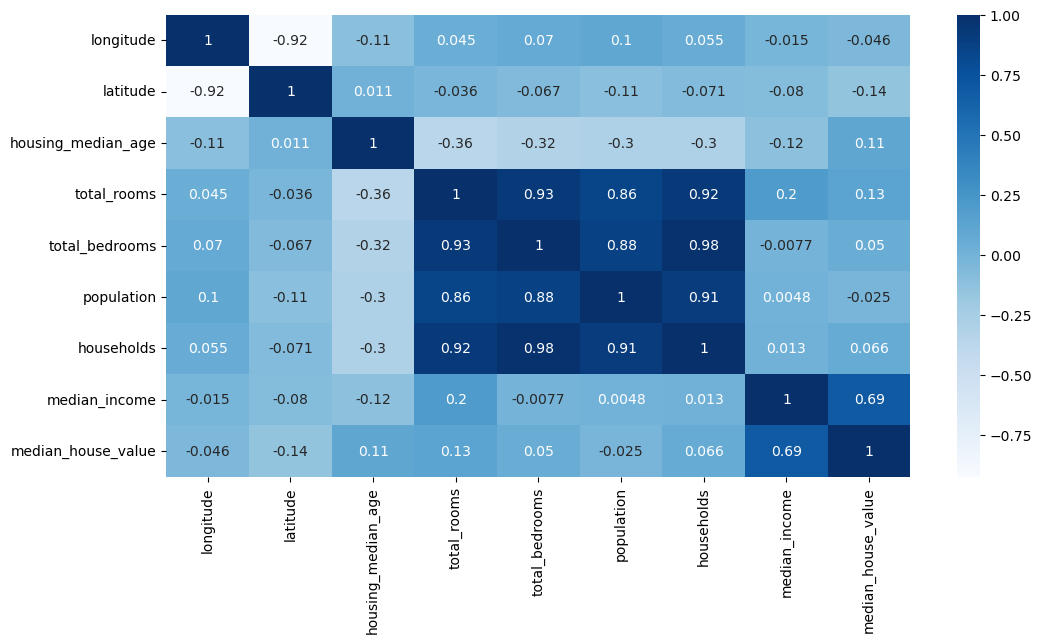

In [35]:
## you can show this as heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df_housing.select_dtypes(include="number").corr(), annot=True, cmap="Blues") ##symmetric matrix
plt.show()

* > `Comment: It seems that the most correlated Feature with target is (median_income) as I predict that, and feature like (households & population) are less correlated` 

### Feature Engineering
`Try to add some features, thinking that it will be more useful and more correlated to the target`

In [39]:
## Try to make some Feature Engineering --> Feature Extraction --> Add the new column to the main DF
df_housing["rooms_per_household"] = df_housing["total_rooms"] / df_housing["households"]
df_housing["bedroms_per_rooms"] = df_housing["total_bedrooms"] / df_housing["total_rooms"]
df_housing["population_per_household"] = df_housing["population"] / df_housing["households"]

In [41]:
# check the correlation again
df_housing.select_dtypes(include="number").corr()['median_house_value'].sort_values(ascending=False)  ## some progress for out new features (very good)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

* > `Comment:Some progress for out new features (very good), Strong correlation` 

### `Split the Dataset`
`I will split the Dataset using ordinary method (random method) not (Stratified method)`

In [45]:
## Split the whole dataset to feature and target
x = df_housing.drop(columns=["median_house_value"],axis=1) ## features
y = df_housing["median_house_value"] ## target

In [47]:
## Random split the dataset to two sets (train_set, valid_set, test_set)
## Firstly split to (train_full_set, test_set) then split (train_full_set) to (train_set, valid_set)
## Firstly
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.15, random_state=123, shuffle=True)
## secondly
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full,y_train_full, test_size=0.2, random_state=125, shuffle=True)

## check shape
print("x_train shape--", x_train.shape)
print("y_train shape--", y_train.shape)
print("x_valid shape--", x_valid.shape)
print("y_valid shape--", y_valid.shape)
print("x_test shape",x_test.shape)
print("y_test shape--", y_test.shape)

x_train shape-- (14035, 12)
y_train shape-- (14035,)
x_valid shape-- (3509, 12)
y_valid shape-- (3509,)
x_test shape (3096, 12)
y_test shape-- (3096,)


* `Notes in sklearn, Read Crarefully:` <br />
    * `.fit --> means that the instance you created is trying to learn or train`
    * `.transform --> means that the instance you created has learned and now time to apply what it learned by trasnforming`
    * `.fit_transform --> means the two above steps in one step, and don't use this method except with training data`
    * `We fit to train the data, and after it learns we transform (train, valid, test)`
    * `In other meaning --> (.fit) then (.transform) to training data or (fit_transform) in one step`
    * `In other meaning --> only (.transform) to other data after learing to training data`

### Dealing with nulls

In [51]:
## Separete the columns according to type (numerical or categorical)
num_cols = [col for col in x_train.columns
            if x_train[col].dtype in ["float64", "int64"]]

categ_cols = [col for col in x_train.columns
             if x_train[col].dtype not in ["float64", "int64"]]

print("Numerical Columns : \n", num_cols)
print("**"*30)
print("Categorical Columns : \n", categ_cols)

Numerical Columns : 
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedroms_per_rooms', 'population_per_household']
************************************************************
Categorical Columns : 
 ['ocean_proximity']


In [53]:
## I choose to impute the nulls with median --> using SimpleImputer
imputer = SimpleImputer(strategy="median") ## define an instance
## fit and transform to training data (only Numerical)
x_train_filled = imputer.fit_transform(x_train[num_cols])

## transform valid and test datasets
x_valid_filled = imputer.transform(x_valid[num_cols])
x_test_filled = imputer.transform(x_test[num_cols])

### Standardize the Dataset

In [56]:
## using StandardScaler for each Feature to be (mean=0, std=1)
## This techniques helps for better training and to converge faster and put all features in the same scale
scaler = StandardScaler() ##define an instance

## fit and transform to training data (only Numerical)
x_train_scaled = scaler.fit_transform(x_train_filled)

## transform valid and test datasets
x_valid_scaled = scaler.transform(x_valid_filled)
x_test_scaled = scaler.transform(x_test_filled)

### `Pipeline for Numerical Features  --  I will use it in this Project`
`Building a pipeline is much easier and better while inference at new dataset`

### Pipeline for Numerical Feature-- I will use it in this project

In [60]:
## Building a pipeline for numerical variables
num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

## deal with (num_pipline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_num = num_pipline.fit_transform(x_train[num_cols])
X_valid_num = num_pipline.transform(x_valid[num_cols])
X_test_num = num_pipline.transform(x_test[num_cols])  ## much easier and much better

### Categorical Features

### `Categorical Features`
`Categorical Features should be encoed before being passed to the Model, there are more than one type of encoding`
* `Label Encoding: mapping categories to numbers start from 0 to the length of categories and map these values in one column`
* `Ordinal Encoding: mapping ordinal categories start from 0 to the length of categories but orderd 0<1<2 ...`
* `OHE = One Hot Encoding: mapped to multiple columns, column for each category, each column contains ones when this category is mentioned`

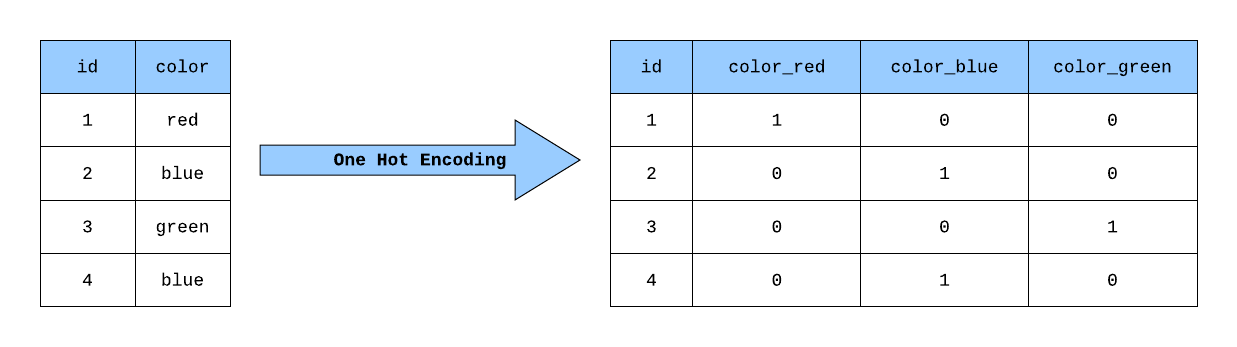

In [92]:
from IPython.display import Image

Image(filename=r"C:\Users\20109\OneDrive - Egyptian E-Learning University\Desktop\Projects_Data\Machine Learning\1- ML_Regression_full_House\color_encoder.png")

In [68]:
from sklearn.preprocessing import LabelEncoder  ## هنا بنستورد الكلاس

lbl_encoder = LabelEncoder()    ## نعرف نسخة منه
X_train_encoded = lbl_encoder.fit_transform(x_train[categ_cols].values[:, 0])  ## fit و transform للبيانات
X_valid_encoded = lbl_encoder.transform(x_valid[categ_cols].values[:, 0])
X_test_encoded = lbl_encoder.transform(x_test[categ_cols].values[:, 0])

### `Pipeline for Categorical Features -- I will use it in this Project`
`Use OHE -> it is preferable to use OHE when encoding for Features, But if you are encoding the Target, you MUST encode using LabelEncoder, except in Deep Learning we can use OHE for target, but for now, you can use LabelEncoder or OrdinalEncoder or OneHotEncoder for Features and only LabelEncoder for target --- take care of this Note`

In [71]:
## Define pipeline for categorical columns --> use OneHotEncoder = OHE
categ_pipeline = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse_output=False))])


## deal with (categ_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_categ = categ_pipeline.fit_transform(x_train[categ_cols])
X_valid_categ = categ_pipeline.transform(x_valid[categ_cols])
X_test_categ = categ_pipeline.transform(x_test[categ_cols])  ## much easier and much better

### `Get all Together`
* `Now we have outputs from Numerical Pipeline and Cateforical Pipeline`
* `We have two solutions:`
    * `Conactenate the Features (Numerical after processing) and (Encoded Categorical)`
    * `You can use (FeatureUnion or ColumnTransformer) provided in sklearn`

In [74]:
## We can get much much easier like the following
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes):
        self.attributes = attributes
    
    def fit(self, X, y=None):
        return self  # No fitting necessary, we are just selecting columns
    
    def transform(self, X):
        return X[self.attributes].values  # Select the specified columns

## numerical pipeline
num_pipeline = Pipeline([
                    ('selector', DataFrameSelector(num_cols)),    ## select only these columns
                    ('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler())])

## categorical pipeline
categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(categ_cols)),    ## select only these columns
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse_output=False))])

## concatenate both two pipelines
total_pipeline = FeatureUnion(transformer_list=[
                                ('num_pip', num_pipeline),
                                ('categ_pipeline', categ_pipeline)])

## deal with (total_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_final = total_pipeline.fit_transform(x_train)
X_valid_final = total_pipeline.transform(x_valid)
X_test_final = total_pipeline.transform(x_test)                 ### Every thing is processed :D

### `Building ML Models`

`Evaluation Metric: RMSE`

### `LinearRegression`

In [78]:
## define the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_final, y_train)  ## train

LinearRegression()

In [80]:
## prediction
y_pred_train_lin = lin_reg.predict(X_train_final)  ## predict the training data
y_pred_valid_lin = lin_reg.predict(X_valid_final)  ## predict the training data

## RMSE
rmse_train_lin = (mean_squared_error(y_train, y_pred_train_lin))**0.5
rmse_valid_lin = (mean_squared_error(y_valid, y_pred_valid_lin))**0.5

## R2 score
r2_train_lin = r2_score(y_train, y_pred_train_lin)
r2_valid_lin = r2_score(y_valid, y_pred_valid_lin)


print(f'RMSE for training set using LinearRegression -- {rmse_train_lin:.3f}')
print(f'RMSE for validating set using LinearRegression -- {rmse_valid_lin:.3f}')   
print('**'*40)
print(f'R2 Score for training set using LinearRegression -- {r2_train_lin:.3f}')
print(f'R2 Score for validating set using LinearRegression -- {r2_valid_lin:.3f}')      ## not bad

RMSE for training set using LinearRegression -- 67603.152
RMSE for validating set using LinearRegression -- 68286.294
********************************************************************************
R2 Score for training set using LinearRegression -- 0.655
R2 Score for validating set using LinearRegression -- 0.650


In [82]:
## define the model --> ## initialize some random Hyperparameter --> we will tune later
sgd_reg = SGDRegressor(penalty=None, eta0=0.001, shuffle=True, max_iter=10000)  
sgd_reg.fit(X_train_final, y_train)  ## train the model

SGDRegressor(eta0=0.001, max_iter=10000, penalty=None)

In [84]:
## prediction
y_pred_train_sgd = sgd_reg.predict(X_train_final)  ## predict the training data
y_pred_valid_sgd = sgd_reg.predict(X_valid_final)  ## predict the training data

## RMSE
rmse_train_sgd = (mean_squared_error(y_train, y_pred_train_sgd))**0.5
rmse_valid_sgd = (mean_squared_error(y_valid, y_pred_valid_sgd))**0.5

## R2 score
r2_train_sgd = r2_score(y_train, y_pred_train_sgd)
r2_valid_sgd = r2_score(y_valid, y_pred_valid_sgd)


print(f'RMSE for training set using SGDRegression -- {rmse_train_sgd:.3f}')
print(f'RMSE for validating set using SGDRegression -- {rmse_valid_sgd:.3f}')   
print('**'*40)
print(f'R2 Score for training set using SGDRegression -- {r2_train_sgd:.3f}')
print(f'R2 Score for validating set using SGDRegression -- {r2_valid_sgd:.3f}')         ## not bad

RMSE for training set using SGDRegression -- 67740.772
RMSE for validating set using SGDRegression -- 68359.767
********************************************************************************
R2 Score for training set using SGDRegression -- 0.653
R2 Score for validating set using SGDRegression -- 0.649


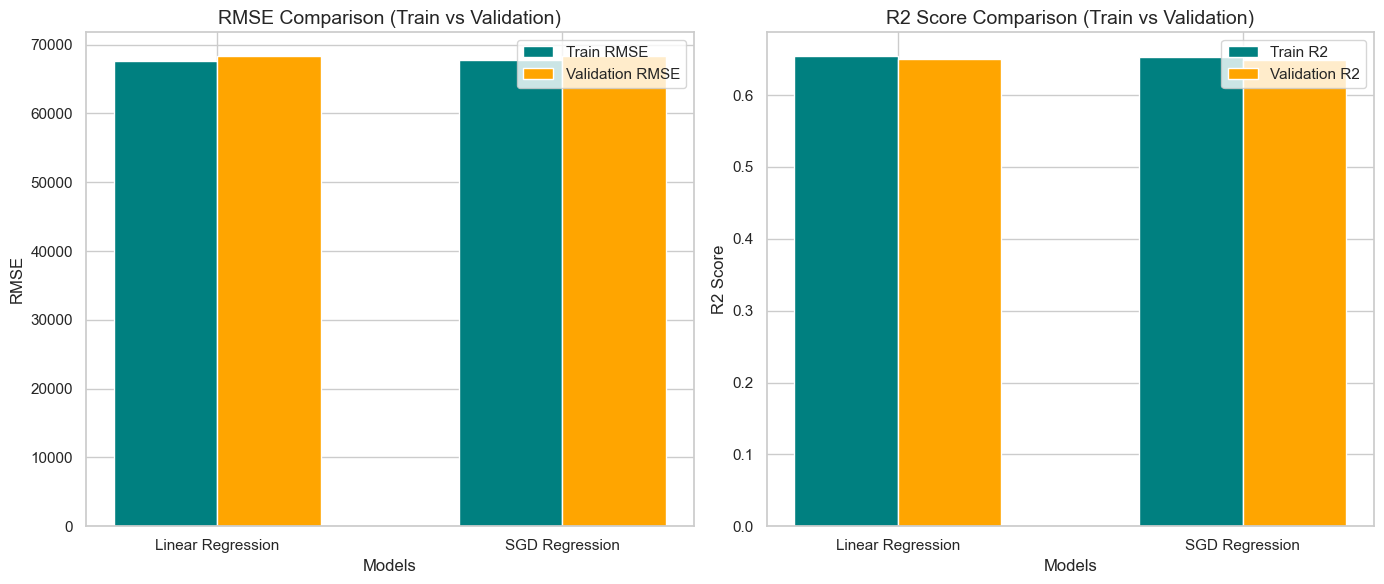

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data RMSE و R2 score
models = ['Linear Regression', 'SGD Regression']
rmse_train = [rmse_train_lin, rmse_train_sgd]
rmse_valid = [rmse_valid_lin, rmse_valid_sgd]
r2_train = [r2_train_lin, r2_train_sgd]
r2_valid = [r2_valid_lin, r2_valid_sgd]

# 
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# ============== 1. RMSE Comparison ==============
bar_width = 0.3
index = np.arange(len(models))

ax[0].bar(index - bar_width / 2, rmse_train, bar_width, label='Train RMSE', color='teal')
ax[0].bar(index + bar_width / 2, rmse_valid, bar_width, label='Validation RMSE', color='orange')

ax[0].set_title('RMSE Comparison (Train vs Validation)', fontsize=14)
ax[0].set_xlabel('Models', fontsize=12)
ax[0].set_ylabel('RMSE', fontsize=12)
ax[0].set_xticks(index)
ax[0].set_xticklabels(models)
ax[0].legend()

# ============== 2. R2 Score Comparison ==============
ax[1].bar(index - bar_width / 2, r2_train, bar_width, label='Train R2', color='teal')
ax[1].bar(index + bar_width / 2, r2_valid, bar_width, label='Validation R2', color='orange')

ax[1].set_title('R2 Score Comparison (Train vs Validation)', fontsize=14)
ax[1].set_xlabel('Models', fontsize=12)
ax[1].set_ylabel('R2 Score', fontsize=12)
ax[1].set_xticks(index)
ax[1].set_xticklabels(models)
ax[1].legend()

# setting shape
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # use model save

# 
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# create model
gbr = GradientBoostingRegressor()

# GridSearchCV
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# trin Data
grid_search.fit(X_train_final, y_train)

# explore the best settings
best_params = grid_search.best_params_
print("أفضل الإعدادات:", best_params)

# explore the best model
best_gbr = grid_search.best_estimator_

# cross-validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_gbr, X_train_final, y_train, cv=5, scoring='r2')
print("Average R² score from cross-validation:", scores.mean())

# prediction in trin
y_pred_train = best_gbr.predict(X_train_final)
y_pred_valid = best_gbr.predict(X_valid_final)

# Calculation of metrics
rmse_train = (mean_squared_error(y_train, y_pred_train))**0.5
rmse_valid = (mean_squared_error(y_valid, y_pred_valid))**0.5

r2_train = r2_score(y_train, y_pred_train)
r2_valid = r2_score(y_valid, y_pred_valid)

# print results
print(f'RMSE for training set (best GBR) -- {rmse_train:.3f}')
print(f'RMSE for validation set (best GBR) -- {rmse_valid:.3f}')
print('*' * 80)
print(f'R2 Score for training set (best GBR) -- {r2_train:.3f}')
print(f'R2 Score for validation set (best GBR) -- {r2_valid:.3f}')

# save the best model
joblib.dump(best_gbr, 'best_gbr_model.pkl')

# load model
# loaded_model = joblib.load('best_gbr_model.pkl')

Fitting 3 folds for each of 16 candidates, totalling 48 fits
أفضل الإعدادات: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Average R² score from cross-validation: 0.8278509534521838
RMSE for training set (best GBR) -- 34247.653
RMSE for validation set (best GBR) -- 46807.841
********************************************************************************
R2 Score for training set (best GBR) -- 0.911
R2 Score for validation set (best GBR) -- 0.836


['best_gbr_model.pkl']

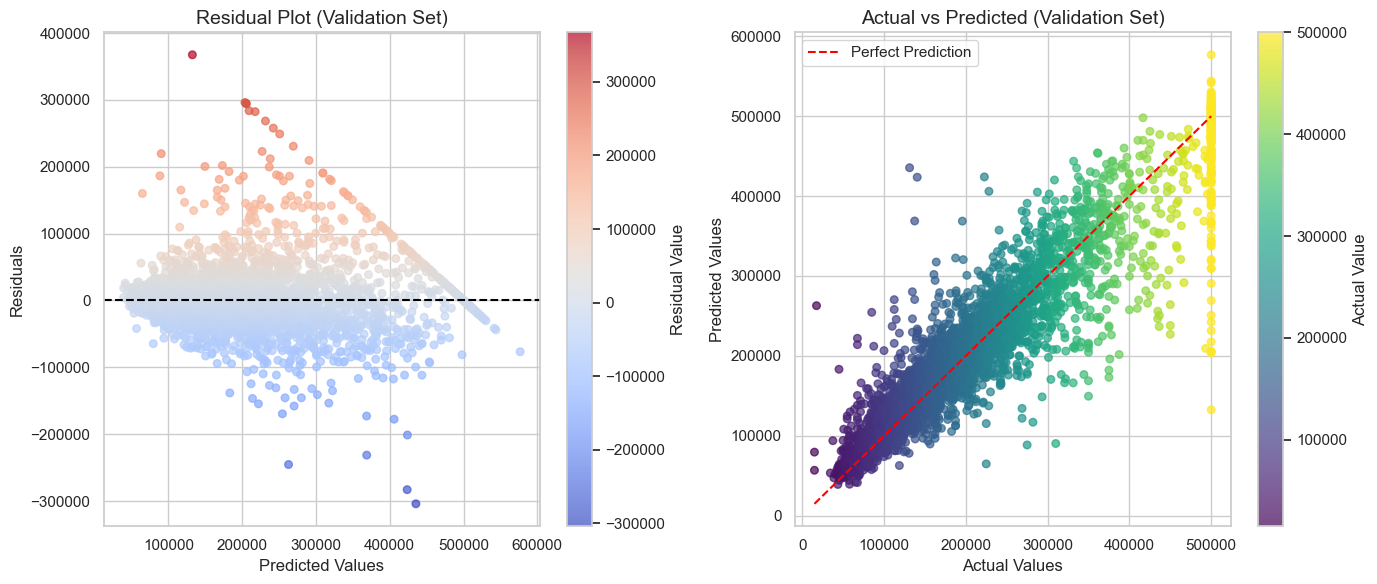

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ do style seaborn
sns.set_theme(style="whitegrid", palette="pastel")

# ✅ size figure
plt.figure(figsize=(14, 6))

# ============== 1. Residual Plot ==============
residuals = y_valid - y_pred_valid

plt.subplot(1, 2, 1)
sc1 = plt.scatter(y_pred_valid, residuals, c=residuals, cmap="coolwarm", s=30, alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.colorbar(sc1, label="Residual Value")
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot (Validation Set)', fontsize=14)
plt.grid(True)

# ============== 2. Actual vs Predicted ==============
plt.subplot(1, 2, 2)
sc2 = plt.scatter(y_valid, y_pred_valid, c=y_valid, cmap="viridis", s=30, alpha=0.7)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.colorbar(sc2, label="Actual Value")
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs Predicted (Validation Set)', fontsize=14)
plt.legend()
plt.grid(True)

# ✅ done shape
plt.tight_layout()
plt.show()

### The Best Model XGBRegressor high accuracy in models

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib  

# تحديد الشبكة لتجربة المعاملات
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# create model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Data trin
grid_search.fit(X_train_final, y_train)

# 
best_params = grid_search.best_params_
print("أفضل الإعدادات:", best_params)

# use the best model
best_xgb = grid_search.best_estimator_

# cross-validation
scores = cross_val_score(best_xgb, X_train_final, y_train, cv=5, scoring='r2')
print("Average R² score from cross-validation:", scores.mean())

# prediction in data
y_pred_train = best_xgb.predict(X_train_final)
y_pred_valid = best_xgb.predict(X_valid_final)

# Calculation of metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_valid = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
r2_train = r2_score(y_train, y_pred_train)
r2_valid = r2_score(y_valid, y_pred_valid)

# print results
print(f'RMSE for training set (XGBoost) -- {rmse_train:.3f}')
print(f'RMSE for validation set (XGBoost) -- {rmse_valid:.3f}')
print('*' * 80)
print(f'R2 Score for training set (XGBoost) -- {r2_train:.3f}')
print(f'R2 Score for validation set (XGBoost) -- {r2_valid:.3f}')

# save the best model
joblib.dump(best_xgb, 'best_xgb_model.pkl')

# Load Model
# loaded_model = joblib.load('best_xgb_model.pkl')

Fitting 3 folds for each of 16 candidates, totalling 48 fits
أفضل الإعدادات: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Average R² score from cross-validation: 0.8335376067955942
RMSE for training set (XGBoost) -- 35209.477
RMSE for validation set (XGBoost) -- 45939.850
********************************************************************************
R2 Score for training set (XGBoost) -- 0.906
R2 Score for validation set (XGBoost) -- 0.842


['best_xgb_model.pkl']

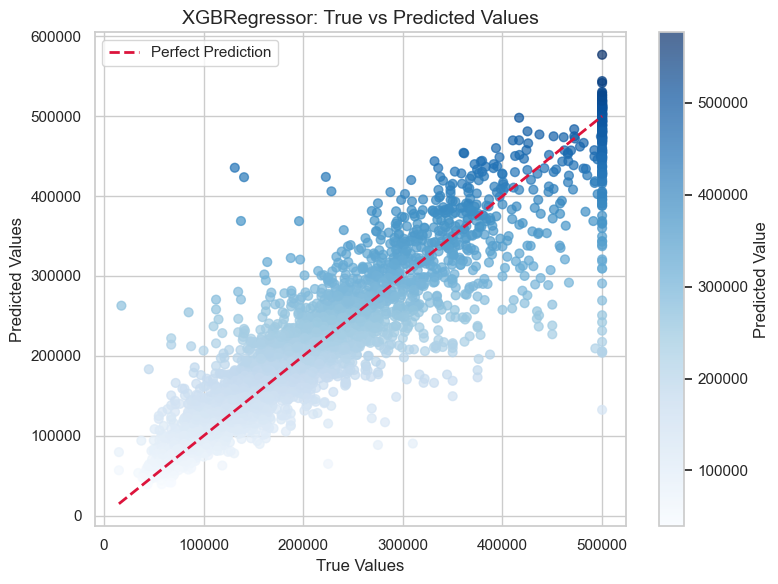

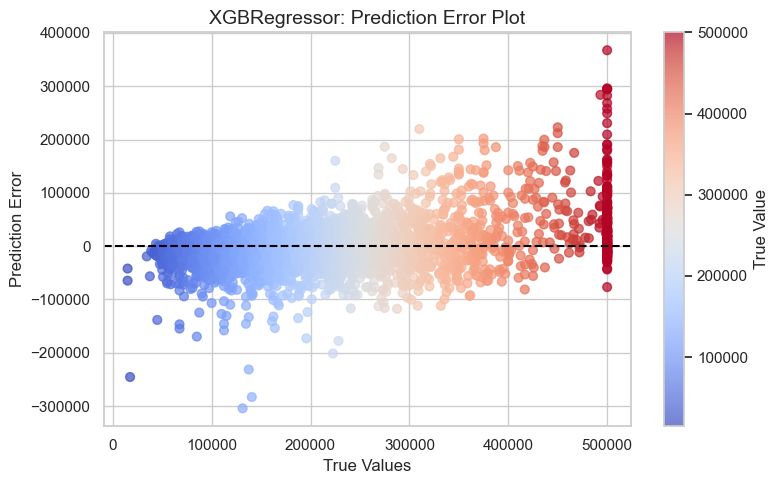

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ do style
sns.set_theme(style="whitegrid")

# ============= 1. True vs Predicted =============
plt.figure(figsize=(8, 6))
sc1 = plt.scatter(
    y_valid, y_pred_xgb,
    c=y_pred_xgb, cmap="Blues",  
    s=40, alpha=0.7
)
plt.plot([min(y_valid), max(y_valid)],
         [min(y_valid), max(y_valid)],
         color='crimson', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.colorbar(sc1, label='Predicted Value')
plt.title('XGBRegressor: True vs Predicted Values', fontsize=14)
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ============= 2. Prediction Error Plot =============
plt.figure(figsize=(8, 5))
sc2 = plt.scatter(
    y_valid, y_valid - y_pred_xgb,
    c=y_valid, cmap="coolwarm",  
    s=40, alpha=0.7
)
plt.axhline(0, color='black', linestyle='--', linewidth=1.5)
plt.colorbar(sc2, label='True Value')

plt.title('XGBRegressor: Prediction Error Plot', fontsize=14)
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Prediction Error', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()